In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Loading the data sets
user_engagement = pd.read_csv('takehome_user_engagement.csv')


In [3]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
with open('takehome_users.csv', 'r', encoding='latin1') as file:
    users = pd.read_csv(file)

In [5]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


C:\Users\mainf\AppData\Local\Temp\ipykernel_39100\3863471391.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_engagement.groupby('user_id').sum().hist()


Text(0, 0.5, 'frequency')

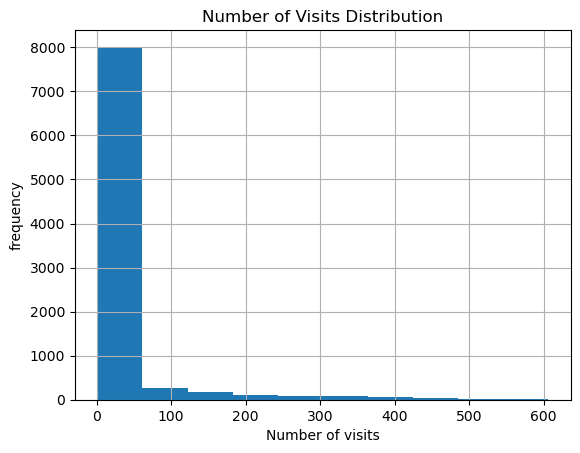

In [6]:
# Finding the distribution of how many visits users made
user_engagement.groupby('user_id').sum().hist()
plt.title('Number of Visits Distribution By User')
plt.xlabel('Number of visits')
plt.ylabel('frequency')

In [7]:
user_engagement['time_stamp'].min()

'2012-05-31 08:20:06'

In [8]:
user_engagement['time_stamp'].max()

'2014-06-06 14:58:50'

In [9]:
print(user_engagement['time_stamp'].dtype)


object


In [10]:
#Changing the Index to a date time object to be able to resample later on
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])

In [11]:
user_engagement.index = user_engagement['time_stamp']

In [12]:
user_engagement.head()

,time_stamp,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2013-12-25 03:45:04,2,1


In [13]:
#Dropping the time stamp columnn since it is now the index and no longer needed. 
user_engagement.drop('time_stamp',axis=1,inplace=True)

In [14]:
#Getting total weekly logins my resampling to once a week
total_weekly_logins = user_engagement.resample('W').size()
total_daily_logins = user_engagement.resample('D').size()

In [15]:
#Getting weekly logins per user
weekly_logins = user_engagement.groupby('user_id').resample('W').visited.count().reset_index(name='login_count')

In [16]:
weekly_logins.head()

,user_id,time_stamp,login_count
0,1,2014-04-27,1
1,2,2013-11-17,1
2,2,2013-11-24,0
3,2,2013-12-01,1
4,2,2013-12-08,0


Text(0.5, 0, 'Number of logins')

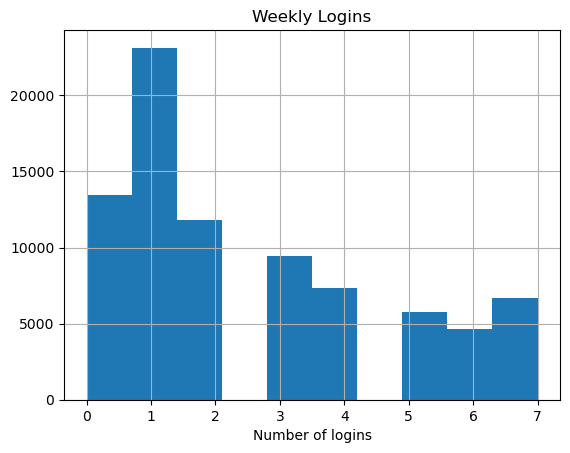

In [17]:
weekly_logins.login_count.hist()
plt.title('Weekly Logins')
plt.xlabel('Number of logins')

In [18]:
# Any user who had 3 or more logins on any given week is considered an adopted user.
# This code filters out the adopted users
adopted_users = weekly_logins[weekly_logins['login_count'] >=3]


In [19]:
adopted_users.head()

,user_id,time_stamp,login_count
13,2,2014-02-09,3
33,10,2013-03-03,3
39,10,2013-04-14,3
41,10,2013-04-28,3
42,10,2013-05-05,4


In [20]:
# Creating a variable that contains each customer id who was considered an adopted user.
# Each user id will only be listed one time and later added to the dataframe.
adopted_users_id_numbers = set(adopted_users['user_id'])

In [21]:
len(adopted_users)

33859

In [22]:
len(adopted_users_id_numbers)

1445

Text(0, 0.5, 'Number of logins')

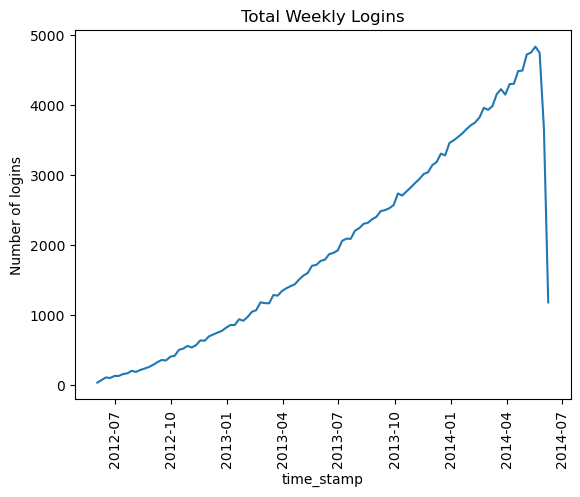

In [23]:
sns.lineplot(total_weekly_logins)
plt.xticks(rotation=90)
plt.title('Total Weekly Logins')
plt.ylabel('Number of logins')
#It looks like logins plummet at the end because the data collection stopped 

Text(0, 0.5, 'Number of logins')

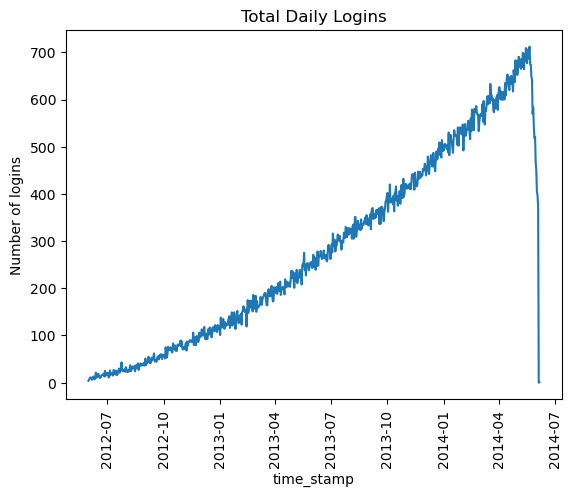

In [24]:
sns.lineplot(total_daily_logins)
plt.xticks(rotation=90)
plt.title('Total Daily Logins')
plt.ylabel('Number of logins')
#It looks like logins plummet at the end because the data collection stopped 

In [25]:
# This is to create a binary column with 0 for non adopted users and 1 for adopted users
adopted_users_column = []
for i in users['object_id']:
    if i in adopted_users_id_numbers:
       adopted_users_column.append(1)
    else:
        adopted_users_column.append(0)
        

In [26]:
# Creating a new column for adopted users and setting it equal to the list created in the previous step.
users['adopted_user'] = adopted_users_column


In [27]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


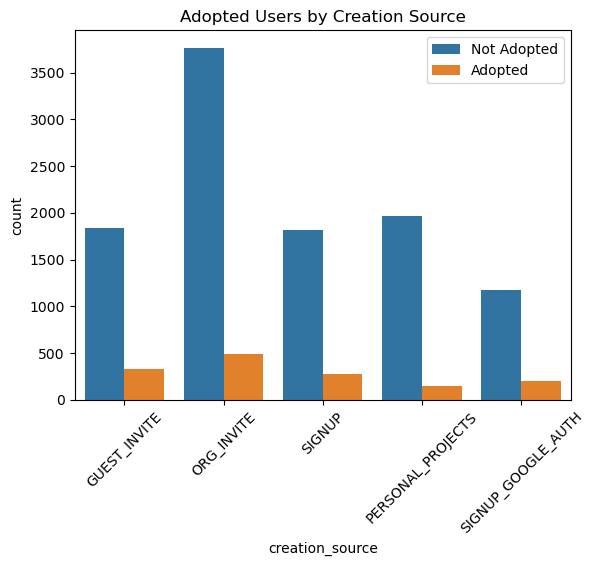

In [28]:
ax = sns.countplot(data=users, x='creation_source', hue='adopted_user')
plt.xticks(rotation=45)
plt.title('Adopted Users by Creation Source')

# Customizing the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Not Adopted', 'Adopted']) 

In [29]:
#This shows the users per creation source and wether or not they are adopted users. 
#It also shows the percentage of adopted users per category
grouped = users.groupby('creation_source').agg(
    total_users=('adopted_user', 'size'),
    adopted_users=('adopted_user', 'sum')
).reset_index()


grouped['percentage_adopted'] = (grouped['adopted_users'] / grouped['total_users']) * 100


print(grouped)

      creation_source  total_users  adopted_users  percentage_adopted
0        GUEST_INVITE         2163            326           15.071660
1          ORG_INVITE         4254            491           11.542078
2   PERSONAL_PROJECTS         2111            147            6.963524
3              SIGNUP         2087            275           13.176809
4  SIGNUP_GOOGLE_AUTH         1385            206           14.873646


In [30]:
#The name, email, and object id features dont help us much with predicting adopted or not adopted so I will drop them.
users.drop(['name','email','object_id'],axis=1,inplace=True)

In [31]:
users.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [32]:
# I need to make dummy variables for creatiton source since it is a categorical variable
users_dummies = pd.get_dummies(users,columns=['creation_source'])

In [33]:
users_dummies.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,2014-04-22 03:53:30,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0
1,2013-11-15 03:45:04,1.396238e+09,0,0,1,316.0,1,0,1,0,0,0
2,2013-03-19 23:14:52,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,0
3,2013-05-21 08:09:28,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0
4,2013-01-17 10:14:20,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0


In [34]:
#There are too many date times in the index, so I will reduce it to just year, and month.
users_dummies['creation_time'] = pd.to_datetime(users_dummies['creation_time'])
users_dummies['creation_time'] = users_dummies['creation_time'].dt.strftime('%Y-%m')

In [35]:
users_dummies.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,2014-04,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0
1,2013-11,1.396238e+09,0,0,1,316.0,1,0,1,0,0,0
2,2013-03,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,0
3,2013-05,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0
4,2013-01,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0


In [36]:
users_dummies.creation_time.unique()

array(['2014-04', '2013-11', '2013-03', '2013-05', '2013-01', '2013-12',
       '2012-12', '2013-07', '2014-03', '2012-10', '2013-02', '2013-08',
       '2014-02', '2012-08', '2013-09', '2014-01', '2013-06', '2013-04',
       '2012-09', '2014-05', '2012-11', '2012-06', '2013-10', '2012-07',
       '2012-05'], dtype=object)

In [37]:
#I will then turn those dates into dummy variables since there are few enough to make that work.
users_dummies = pd.get_dummies(users_dummies,columns=['creation_time'])

In [38]:
users_dummies.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,creation_time_2013-08,creation_time_2013-09,creation_time_2013-10,creation_time_2013-11,creation_time_2013-12,creation_time_2014-01,creation_time_2014-02,creation_time_2014-03,creation_time_2014-04,creation_time_2014-05
0,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.396238e+09,0,0,1,316.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#I now need to beak the data into features and targer value for later processing and machine learning.
X = np.array(users_dummies.drop('adopted_user',axis=1))
y = users_dummies['adopted_user']

In [40]:
# I will go for a gradient boost model and import the neccesary packages and assessment tools.
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score


In [41]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [42]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [43]:
#Setting hyperparameters
params = {
    'max_depth': 3, 
    'eta': 0.1, 
    'objective': 'binary:logistic', 
    'eval_metric': 'auc'  
}

In [44]:
num_round = 100  
bst = xgb.train(params, dtrain, num_round)


In [45]:
# This is to make a binary prediction of 0 or 1 
y_pred = bst.predict(dtest)
y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]  


In [50]:
from sklearn.metrics import classification_report
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Calculate the ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.9675
ROC AUC: 0.9862520088388911
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2096
           1       0.93      0.80      0.86       304

    accuracy                           0.97      2400
   macro avg       0.95      0.90      0.92      2400
weighted avg       0.97      0.97      0.97      2400



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

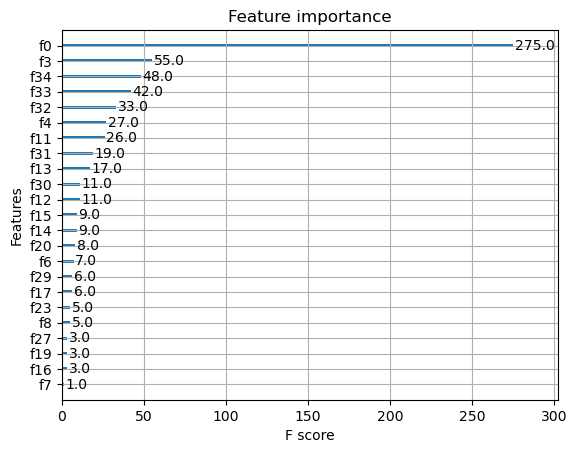

In [47]:
#I want to see which features were most important in predicting adopted users
from xgboost import plot_importance
plot_importance(bst)

<Axes: xlabel='adopted_user', ylabel='last_session_creation_time'>

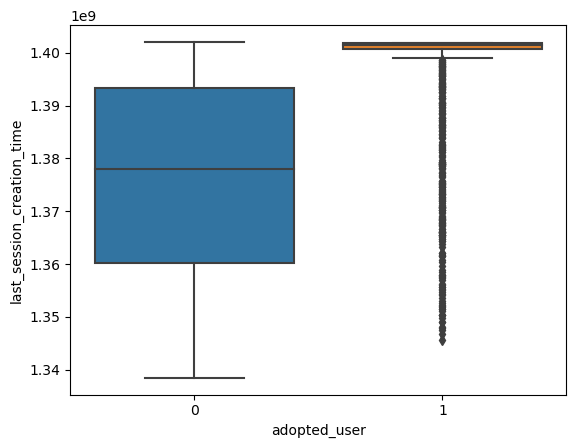

In [48]:
sns.boxplot(x='adopted_user',y='last_session_creation_time',data=users_dummies)

Conclusion. As the box plot shows and the feature importance grid, it seems like last login time was the most important feature in determining who was going to be an adopted user and who wasnt. More recent login times were a very stong predictor and the majority of the adopted users had more recent log in times than non adopted users. 